***
# ISOM3360 Data Mining for Business Analytics
## Group 23 Project Code - Credit Card Defaultee Analysis
### Part 2.1 - Decision Tree Classifier
***

Name: LAM, Ho Chit  
ITSC: hclamao  
SID: 20607878

Name: LEE, Ho Wan Owen  
ITSC: hwolee  
SID: 20604852

Name: LEE, Wai Chung  
ITSC: wcleeaj  
SID: 20702733

### Data preprocessing(cont.)

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#Load cleaned data
#p.s. I first put the cleaned data in data preprocessing part I (before splitting) to the decision tree file before running the code below
raw_df = pd.read_csv('raw2.csv',index_col = 'SK_ID_CURR')

### Dealing with missing values

In [3]:
raw_df.isnull().sum().sum()
#There're many missing values

9054490

In [4]:
pd.set_option('display.max_rows', 500)

In [5]:
raw_df.isnull().sum()

TARGET                                                    0
NAME_CONTRACT_TYPE                                        0
FLAG_OWN_CAR                                              0
CNT_CHILDREN                                              0
AMT_INCOME_TOTAL                                          0
AMT_CREDIT                                                0
AMT_ANNUITY                                               0
AMT_GOODS_PRICE                                           0
REGION_POPULATION_RELATIVE                                0
DAYS_BIRTH                                                0
DAYS_EMPLOYED                                             0
DAYS_REGISTRATION                                         0
DAYS_ID_PUBLISH                                           0
OWN_CAR_AGE                                          202929
FLAG_MOBIL                                                0
FLAG_EMP_PHONE                                            0
FLAG_WORK_PHONE                         

In [6]:
# Filling missing values with mean or mode
raw_df['OBS_30_CNT_SOCIAL_CIRCLE'].mean()

1.4222454239942575

In [7]:
# replace missing values with mean or mode
raw_df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(raw_df['OBS_30_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)

In [8]:
#Doing the same for other relavent features
raw_df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(raw_df['DEF_30_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)
raw_df['DEF_30_CNT_SOCIAL_CIRCLE'].mean()

0.1434206662533827

In [9]:
raw_df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(raw_df['OBS_60_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)
raw_df['OBS_60_CNT_SOCIAL_CIRCLE'].mean()

1.4052921791902133

In [10]:
raw_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(raw_df['DEF_60_CNT_SOCIAL_CIRCLE'].mean(),inplace=True)
raw_df['DEF_60_CNT_SOCIAL_CIRCLE'].mean()

0.10004894123788487

In [11]:
# replace missing values with mode
raw_df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(raw_df['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0],inplace=True)
raw_df['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0]

0.0

In [12]:
raw_df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(raw_df['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0],inplace=True)
raw_df['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0]

0.0

In [13]:
raw_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(raw_df['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0],inplace=True)
raw_df['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0]

0.0

In [14]:
raw_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(raw_df['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0],inplace=True)
raw_df['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0]

0.0

In [15]:
raw_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(raw_df['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0],inplace=True)
raw_df['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0]

0.0

In [16]:
raw_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(raw_df['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0],inplace=True)
raw_df['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0]

0.0

In [17]:
# replace missing values with mean
raw_df['DAYS_LAST_PHONE_CHANGE'].fillna(raw_df['DAYS_LAST_PHONE_CHANGE'].mean(),inplace=True)
raw_df['DAYS_LAST_PHONE_CHANGE'].mean()

-962.8587883320869

In [18]:
raw_df['EXT_SOURCE_2'].fillna(raw_df['EXT_SOURCE_2'].mean(),inplace=True)
raw_df['EXT_SOURCE_2'].mean()

0.5143926741308488

In [19]:
raw_df['EXT_SOURCE_3'].fillna(raw_df['EXT_SOURCE_3'].mean(),inplace=True)
raw_df['EXT_SOURCE_3'].mean()

0.5108529061805426

In [20]:
raw_df.isnull().sum()

TARGET                                                    0
NAME_CONTRACT_TYPE                                        0
FLAG_OWN_CAR                                              0
CNT_CHILDREN                                              0
AMT_INCOME_TOTAL                                          0
AMT_CREDIT                                                0
AMT_ANNUITY                                               0
AMT_GOODS_PRICE                                           0
REGION_POPULATION_RELATIVE                                0
DAYS_BIRTH                                                0
DAYS_EMPLOYED                                             0
DAYS_REGISTRATION                                         0
DAYS_ID_PUBLISH                                           0
OWN_CAR_AGE                                          202929
FLAG_MOBIL                                                0
FLAG_EMP_PHONE                                            0
FLAG_WORK_PHONE                         

In [21]:
#Drop the columns that has number of missing values >100000
raw_df = raw_df.dropna(axis=1)

In [22]:
raw_df.isnull().sum()

TARGET                                               0
NAME_CONTRACT_TYPE                                   0
FLAG_OWN_CAR                                         0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
AMT_CREDIT                                           0
AMT_ANNUITY                                          0
AMT_GOODS_PRICE                                      0
REGION_POPULATION_RELATIVE                           0
DAYS_BIRTH                                           0
DAYS_EMPLOYED                                        0
DAYS_REGISTRATION                                    0
DAYS_ID_PUBLISH                                      0
FLAG_MOBIL                                           0
FLAG_EMP_PHONE                                       0
FLAG_WORK_PHONE                                      0
FLAG_CONT_MOBILE                                     0
FLAG_PHONE                                           0
FLAG_EMAIL

In [23]:
#Save the data to a new file
raw_df.to_csv('raw_no_missing.csv')

### Perform one-hot encoding (Not suitable for Naive Bayes Classification)

In [24]:
raw_df = pd.get_dummies(raw_df, columns=['NAME_CONTRACT_TYPE','OCCUPATION_TYPE','FLAG_OWN_CAR','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE','MALE'],drop_first = True)

#p.s. for Naive Bayes Classification, set drop_first = False. Also, no need modification on MALE and FEMALE.
# Also for NB, do not drop Female 
raw_df = raw_df.drop(columns='FEMALE')

In [25]:
raw_df.isnull().sum()

TARGET                                               0
CNT_CHILDREN                                         0
AMT_INCOME_TOTAL                                     0
AMT_CREDIT                                           0
AMT_ANNUITY                                          0
AMT_GOODS_PRICE                                      0
REGION_POPULATION_RELATIVE                           0
DAYS_BIRTH                                           0
DAYS_EMPLOYED                                        0
DAYS_REGISTRATION                                    0
DAYS_ID_PUBLISH                                      0
FLAG_MOBIL                                           0
FLAG_EMP_PHONE                                       0
FLAG_WORK_PHONE                                      0
FLAG_CONT_MOBILE                                     0
FLAG_PHONE                                           0
FLAG_EMAIL                                           0
CNT_FAM_MEMBERS                                      0
REGION_RAT

## split data into train and hold-out test sets

In [26]:
# split data into train and test sets
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=3360)

In [27]:
# save the datasets and write to csv

train_df.to_csv('train.csv')
test_df.to_csv('test.csv')

### Let's build the first Decision Tree
we will use all the train data to construct the tree and evaluate the model

In [28]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [29]:
# Load cleaned data
train_df = pd.read_csv('train.csv',index_col = 'SK_ID_CURR')
test_df = pd.read_csv('test.csv',index_col = 'SK_ID_CURR')

In [30]:
train_df.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,MALE_True
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
269894,0,0,135000.0,1288350.0,37800.0,1125000.0,0.008866,-16164,-2502,-7968.0,...,0,0,0,0,0,0,0,0,0,0
242625,0,0,34650.0,99000.0,10791.0,99000.0,0.028663,-21891,365243,-9290.0,...,0,0,0,0,0,0,0,0,1,0
444013,0,1,382500.0,481176.0,23278.5,360000.0,0.020713,-15829,-2133,-298.0,...,0,0,0,0,0,0,0,0,0,1
232333,0,0,180000.0,354276.0,13486.5,292500.0,0.007020,-21480,365243,-12551.0,...,0,0,0,0,0,0,0,0,1,0
309827,0,0,90000.0,239850.0,28593.0,225000.0,0.022800,-8165,-1580,-2736.0,...,0,0,0,0,0,0,0,0,0,0


#### Step 1: Define features and target variable

In [31]:
#Get column names
attirbutes =sorted(train_df)
attirbutes.remove('TARGET')
attirbutes

['AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'AMT_INCOME_TOTAL',
 'AMT_INCOME_TOTAL_MINMAX',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_REGISTRATION',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FLAG_EMP_PHONE',
 'FLAG_MOBIL',
 'FL

In [32]:
# define independent variables / attirbutes / features
features = attirbutes
# define one single target variable / label
target = ['TARGET']

# get defined training dataset
X = train_df[features]
y = train_df[target]

#### Step 2: Split data into training and validation set

In [33]:
# import train split function
from sklearn.model_selection import train_test_split

# split data into 80% and 20%, put 20% in testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3360)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196806 entries, 329669 to 137065
Columns: 170 entries, AMT_ANNUITY to WEEKDAY_APPR_PROCESS_START_WEDNESDAY
dtypes: float64(21), int64(149)
memory usage: 256.8 MB


#### Step 3: Build a Tree based on 80% train data

In [34]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
# define our model as a decision tree model
model = DecisionTreeClassifier(random_state=3360)

In [36]:
# build the decision tree model based on defalut hyperparameter settings
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3360, splitter='best')

#### Visualize the Decision Tree? No. Tree is too big to be visualized.

In [37]:
# import library for visuaiization
# from sklearn import tree
# import matplotlib.pyplot as plt

In [38]:
# plt.figure(figsize = (100,150))
# tree.plot_tree(model,ax=None, fontsize=50)
# plt.show()

#### Step 4: Evaluate the model on 20% validation set

- Calculate:
  - Accuracy
  - Precision
  - Recall
  <!-- - F1 score -->
- Display confusion matrix

In [39]:
# import evaluation tools
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [40]:
# test model base on 20% data
pred_val = model.predict(X_val)

In [41]:
# print evaluation result for 20% test data
print("Accuracy from 20% test data:",accuracy_score(y_val, pred_val, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_val, pred_val))
print("Classification Report:", '\n', classification_report(y_val, pred_val))

Accuracy from 20% test data: 0.851997886264786
Confusion Matrix 
 [[41254  3926]
 [ 3356   666]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.91      0.92     45180
           1       0.15      0.17      0.15      4022

    accuracy                           0.85     49202
   macro avg       0.53      0.54      0.54     49202
weighted avg       0.86      0.85      0.86     49202



In [42]:
# test model base on 80% data for training
pred_val_Xtrain= model.predict(X_train)

In [43]:
# print evaluation result for 80% train data
print("Accuracy from 80% train data:",accuracy_score(y_train, pred_val_Xtrain, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_train, pred_val_Xtrain))
print("Classification Report:", '\n', classification_report(y_train, pred_val_Xtrain))

Accuracy from 80% train data: 1.0
Confusion Matrix 
 [[180885      0]
 [     0  15921]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    180885
           1       1.00      1.00      1.00     15921

    accuracy                           1.00    196806
   macro avg       1.00      1.00      1.00    196806
weighted avg       1.00      1.00      1.00    196806



Since the difference between training and validation accuracy is substantial and the training accuracy is 100%, overfitting occured in this model with default hyperparameters.  
There are 3 methods to reduce overfitting:
- Hyperparameter tuning (manual)
- Cross validation
- Hyperparameter tuning (via GridSearchCV)

### Manual Hyperparameter Tuning (Tuning tree depth)

#### Let's fit the decision tree with depths ranging from 1 to 32 and plot the train and test accuracy scores

In [44]:
# create an array that holds the max_depth
max_depth = np. linspace(1,32,32, endpoint=True)

In [45]:
max_depth

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])

In [46]:
# create a loop to try out different depth value
train_results =[]
test_results = []
# create a loop to try out all the number from 1 to 32 for max_depths in a decision tree
for max_depth_i in max_depth:
    dt = DecisionTreeClassifier(max_depth=max_depth_i)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    accuracy = accuracy_score(y_train, train_pred, normalize=True, sample_weight=None)
    train_results.append(accuracy)
    
    y_pred = dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred, normalize=True, sample_weight=None)
    test_results.append(accuracy)

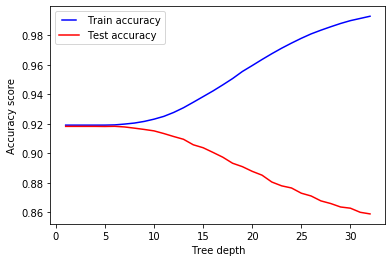

In [47]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depth, test_results, 'r', label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

It seems that max_depth around 2-5 is appropriate.

### 5-fold Cross validation for tuning min_samples_leaf

In [48]:
# Function to plot the results
def plot_fitting_curves(results):
    results.plot("min_leaves")
    plt.ylabel("Accuracy")
    plt.xlabel("Min samples per leaf (inverse of complexity)")
    plt.show()

Size of training data: 157444
Size of validation data: 49202


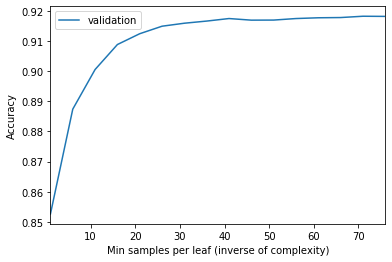

In [49]:
# Split into a sub training set and validation set
X_strain, X_val2, y_strain, y_val2 = train_test_split(X_train, y_train, test_size=0.2, random_state=3360)
print(f"Size of training data: {X_strain.shape[0]}")
print(f"Size of validation data: {X_val.shape[0]}")

min_leaves = range(1,80,5)

Accuracy_val = []
for m in min_leaves:
    # We train the model with only a portion of the training data (the 'sub-training' data set)
    model_val = DecisionTreeClassifier(min_samples_leaf=m, random_state=3360)
    model_val.fit(X_strain, y_strain)
    predictions_val = model_val.predict(X_val2)
    # And we evaluate in the validation set
    accuracy_val = accuracy_score(y_val2, predictions_val,normalize=True, sample_weight=None)
    Accuracy_val.append(accuracy_val)

results = pd.DataFrame({"min_leaves": min_leaves, "validation":Accuracy_val})
plot_fitting_curves(results)

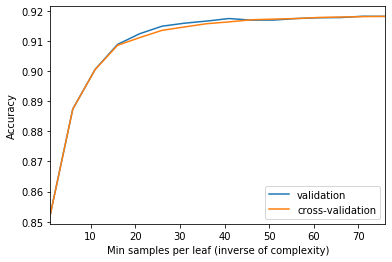

In [50]:
from sklearn.model_selection import cross_val_predict

Accuracy_cv = []
for m in min_leaves:
    # Define hyperparamter for complexity control
    model_cv = DecisionTreeClassifier(min_samples_leaf=m, random_state=3360)
    # Evaluate the performance of the hyperparameter with cross validation. 
    # The parameter 'cv' is used to determine the number of splits (folds). 
    predictions_cv = cross_val_predict(model_cv, X_train, y_train, cv=5)
    accuracy_cv = accuracy_score(y_train, predictions_cv,normalize=True, sample_weight=None)
    Accuracy_cv.append(accuracy_cv)

results = pd.DataFrame({"min_leaves": min_leaves, "validation":Accuracy_val, "cross-validation":Accuracy_cv})
plot_fitting_curves(results)

### GridSearchCV

In [51]:
# create try_grid
try_grid = [{'max_leaf_nodes': np.arange(2, 9)*20,                   # 40,  60,  80, 100, 120, 140, 160
             'min_samples_split': np.arange(2, 6)}]                  # 2 - 5

In [52]:
from sklearn.model_selection import GridSearchCV

# create GridSearchCV object
DTM = GridSearchCV(DecisionTreeClassifier(random_state=3360), param_grid=try_grid, cv=4)

In [53]:
DTM.fit(X_train,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=3360,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_leaf_nodes': array([ 40,  60,  80, 100, 120, 140, 160]),
                          'min_samples_split': a

In [54]:
# find the best parameters
DTM.best_params_

{'max_leaf_nodes': 40, 'min_samples_split': 2}

In [55]:
DTM.best_score_

0.9186508541406257

##### Combination of hyperparameters above
- max_depth = 5
- max_leaf_nodes = 40
- min_samples_split = 2
- min_samples_leaf = 70

In [56]:
my_model = DecisionTreeClassifier(max_leaf_nodes = 40, max_depth = 5,min_samples_leaf=70 ,min_samples_split=2)

In [57]:
my_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=40,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=70, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
y_predict = my_model.predict(X_val)

In [59]:
accuracy_score(y_val, y_predict, normalize=True, sample_weight=None)

0.9182553554733548

In [60]:
print("Accuracy:",accuracy_score(y_val, y_predict, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_val, y_predict))
print("Classification Report:", '\n', classification_report(y_val, y_predict))

Accuracy: 0.9182553554733548
Confusion Matrix 
 [[45180     0]
 [ 4022     0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     45180
           1       0.00      0.00      0.00      4022

    accuracy                           0.92     49202
   macro avg       0.46      0.50      0.48     49202
weighted avg       0.84      0.92      0.88     49202



C:\Users\wclee\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Something wrong with the model. The model is making predictions of all 0s. That means the model is not doing anything better than the majority classifier!!
Potential reason: There might exist some irrelevant variables which leads to
unnecessary complexity

## Balancing the data

In [71]:
print("Out of ", train_df.shape[0], " customers, only", train_df['TARGET'].sum(), " cutomers default!")

Out of  246008  customers, only 19943  cutomers default!


### Downsample the nondefault cases

In [72]:
balanced_train = train_df.drop(train_df[train_df.TARGET==0].index[0:206122])
print("Out of ", balanced_train.shape[0], " customers, ", balanced_train['TARGET'].sum(), " customers default!")

Out of  39886  customers,  19943  customers default!


In [75]:
print("Out of ", test_df.shape[0], " customers, only", test_df['TARGET'].sum(), " cutomers default!")

Out of  61503  customers, only 4882  cutomers default!


In [77]:
balanced_test = test_df.drop(test_df[test_df.TARGET==0].index[0:51739])
print("Out of ", balanced_test.shape[0], " customers, ", balanced_test['TARGET'].sum(), " customers default!")

Out of  9764  customers,  4882  customers default!


## Feature selection

In [70]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as smf
from scipy.stats import chi2_contingency

#### Use  correlation coefficient to find 30 most important features which have higher associations with response variable Y.

In [73]:
np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31]

EXT_SOURCE_3                                         0.276989
EXT_SOURCE_2                                         0.270417
DAYS_BIRTH                                           0.143473
REGION_RATING_CLIENT_W_CITY                          0.112715
REGION_RATING_CLIENT                                 0.107632
NAME_EDUCATION_TYPE_Higher education                 0.107554
DAYS_LAST_PHONE_CHANGE                               0.100500
NAME_INCOME_TYPE_Working                             0.098406
NAME_EDUCATION_TYPE_Secondary / secondary special    0.094827
DAYS_ID_PUBLISH                                      0.092455
MALE_True                                            0.092070
NAME_INCOME_TYPE_Pensioner                           0.088799
FLAG_EMP_PHONE                                       0.088433
ORGANIZATION_TYPE_XNA                                0.088433
FLAG_DOCUMENT_3                                      0.087773
DAYS_EMPLOYED                                        0.086398
REG_CITY

In [74]:
# Check for collinearity
predictors=list(np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31].index)
M=balanced_train[predictors].corr()
# check for colinearity: detect those with at least 0.95 (absolute sense)
for i in range(M.shape[0]):
    for j in range(i):
        if M.iloc[i,j]>0.95 or M.iloc[i,j]<-0.95:
            print(M.index[i],M.columns[j], M.iloc[i,j])   

REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY 0.9518590317009158
FLAG_EMP_PHONE NAME_INCOME_TYPE_Pensioner -0.9995149394810388
ORGANIZATION_TYPE_XNA NAME_INCOME_TYPE_Pensioner 0.9995149394810388
ORGANIZATION_TYPE_XNA FLAG_EMP_PHONE -1.0
DAYS_EMPLOYED NAME_INCOME_TYPE_Pensioner 0.9994032640918377
DAYS_EMPLOYED FLAG_EMP_PHONE -0.9998883910844905
DAYS_EMPLOYED ORGANIZATION_TYPE_XNA 0.9998883910844905
AMT_CREDIT AMT_GOODS_PRICE 0.9848234175019529


In [78]:
#Drop the variable with multicolinearity problem.
balanced_train = balanced_train.drop(columns='FLAG_EMP_PHONE')

In [79]:
balanced_train = balanced_train.drop(columns='ORGANIZATION_TYPE_XNA')

In [80]:
balanced_train = balanced_train.drop(columns='DAYS_EMPLOYED')

In [83]:
balanced_test = balanced_test.drop(columns='FLAG_EMP_PHONE')
balanced_test = balanced_test.drop(columns='ORGANIZATION_TYPE_XNA')
balanced_test = balanced_test.drop(columns='DAYS_EMPLOYED')

In [81]:
np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31]

EXT_SOURCE_3                                         0.276989
EXT_SOURCE_2                                         0.270417
DAYS_BIRTH                                           0.143473
REGION_RATING_CLIENT_W_CITY                          0.112715
REGION_RATING_CLIENT                                 0.107632
NAME_EDUCATION_TYPE_Higher education                 0.107554
DAYS_LAST_PHONE_CHANGE                               0.100500
NAME_INCOME_TYPE_Working                             0.098406
NAME_EDUCATION_TYPE_Secondary / secondary special    0.094827
DAYS_ID_PUBLISH                                      0.092455
MALE_True                                            0.092070
NAME_INCOME_TYPE_Pensioner                           0.088799
FLAG_DOCUMENT_3                                      0.087773
REG_CITY_NOT_WORK_CITY                               0.086238
AMT_GOODS_PRICE                                      0.081302
DAYS_REGISTRATION                                    0.078690
REG_CITY

In [82]:
# Check for collinearity
predictors=list(np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31].index)
M=balanced_train[predictors].corr()
# check for colinearity: detect those with at least 0.95 (absolute sense)
for i in range(M.shape[0]):
    for j in range(i):
        if M.iloc[i,j]>0.95 or M.iloc[i,j]<-0.95:
            print(M.index[i],M.columns[j], M.iloc[i,j])   

REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY 0.9518590317009158
AMT_CREDIT AMT_GOODS_PRICE 0.9848234175019529


In [84]:
balanced_train = balanced_train.drop(columns='REGION_RATING_CLIENT')
balanced_train = balanced_train.drop(columns='AMT_CREDIT')

In [85]:
balanced_test = balanced_test.drop(columns='REGION_RATING_CLIENT')
balanced_test = balanced_test.drop(columns='AMT_CREDIT')

In [86]:
np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31]

EXT_SOURCE_3                                         0.276989
EXT_SOURCE_2                                         0.270417
DAYS_BIRTH                                           0.143473
REGION_RATING_CLIENT_W_CITY                          0.112715
NAME_EDUCATION_TYPE_Higher education                 0.107554
DAYS_LAST_PHONE_CHANGE                               0.100500
NAME_INCOME_TYPE_Working                             0.098406
NAME_EDUCATION_TYPE_Secondary / secondary special    0.094827
DAYS_ID_PUBLISH                                      0.092455
MALE_True                                            0.092070
NAME_INCOME_TYPE_Pensioner                           0.088799
FLAG_DOCUMENT_3                                      0.087773
REG_CITY_NOT_WORK_CITY                               0.086238
AMT_GOODS_PRICE                                      0.081302
DAYS_REGISTRATION                                    0.078690
REG_CITY_NOT_LIVE_CITY                               0.072572
REGION_P

In [87]:
# Check for collinearity
predictors=list(np.abs(balanced_train.corr()["TARGET"]).sort_values(ascending=False).iloc[1:31].index)
M=balanced_train[predictors].corr()
# check for colinearity: detect those with at least 0.95 (absolute sense)
for i in range(M.shape[0]):
    for j in range(i):
        if M.iloc[i,j]>0.95 or M.iloc[i,j]<-0.95:
            print(M.index[i],M.columns[j], M.iloc[i,j]) 

In [90]:
selected_features=['EXT_SOURCE_3','EXT_SOURCE_2','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','NAME_EDUCATION_TYPE_Higher education','DAYS_LAST_PHONE_CHANGE','NAME_INCOME_TYPE_Working','NAME_EDUCATION_TYPE_Secondary / secondary special','DAYS_ID_PUBLISH','MALE_True','NAME_INCOME_TYPE_Pensioner','FLAG_DOCUMENT_3','REG_CITY_NOT_WORK_CITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','REG_CITY_NOT_LIVE_CITY','REGION_POPULATION_RELATIVE','DEF_30_CNT_SOCIAL_CIRCLE','NAME_CONTRACT_TYPE_Revolving loans','DEF_60_CNT_SOCIAL_CIRCLE','LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_6','NAME_FAMILY_STATUS_Single / not married','ORGANIZATION_TYPE_Self-employed','NAME_FAMILY_STATUS_Married','NAME_HOUSING_TYPE_With parents','NAME_HOUSING_TYPE_House / apartment','FLAG_PHONE','OCCUPATION_TYPE_Low-skill Laborers','NAME_INCOME_TYPE_State servant']
len(selected_features)

30

## Build Tree

In [91]:
# define independent variables / attirbutes / features
features = selected_features
# define one single target variable / label
target = ['TARGET']

# get defined training dataset
X = balanced_train[features]
y = balanced_train[target]

In [92]:
# split data into 80% and 20%, put 20% in testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3360)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31908 entries, 181853 to 404373
Data columns (total 30 columns):
EXT_SOURCE_3                                         31908 non-null float64
EXT_SOURCE_2                                         31908 non-null float64
DAYS_BIRTH                                           31908 non-null int64
REGION_RATING_CLIENT_W_CITY                          31908 non-null int64
NAME_EDUCATION_TYPE_Higher education                 31908 non-null int64
DAYS_LAST_PHONE_CHANGE                               31908 non-null float64
NAME_INCOME_TYPE_Working                             31908 non-null int64
NAME_EDUCATION_TYPE_Secondary / secondary special    31908 non-null int64
DAYS_ID_PUBLISH                                      31908 non-null int64
MALE_True                                            31908 non-null int64
NAME_INCOME_TYPE_Pensioner                           31908 non-null int64
FLAG_DOCUMENT_3                                      31908 non-nu

In [93]:
# define our model as a decision tree model
model = DecisionTreeClassifier(random_state=3360)

In [94]:
# build the decision tree model based on defalut hyperparameter settings
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3360, splitter='best')

### Evaluate the model

In [98]:
# test model base on 20% data
pred_val = model.predict(X_val)

In [99]:
# print evaluation result for 20% test data
print("Accuracy from 20% test data:",accuracy_score(y_val, pred_val, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_val, pred_val))
print("Classification Report:", '\n', classification_report(y_val, pred_val))

Accuracy from 20% test data: 0.5833542241163199
Confusion Matrix 
 [[2287 1741]
 [1583 2367]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.57      0.58      4028
           1       0.58      0.60      0.59      3950

    accuracy                           0.58      7978
   macro avg       0.58      0.58      0.58      7978
weighted avg       0.58      0.58      0.58      7978



In [100]:
# test model base on 80% data for training
pred_val_Xtrain= model.predict(X_train)

In [101]:
# print evaluation result for 80% train data
print("Accuracy from 80% train data:",accuracy_score(y_train, pred_val_Xtrain, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_train, pred_val_Xtrain))
print("Classification Report:", '\n', classification_report(y_train, pred_val_Xtrain))

Accuracy from 80% train data: 1.0
Confusion Matrix 
 [[15915     0]
 [    0 15993]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15915
           1       1.00      1.00      1.00     15993

    accuracy                           1.00     31908
   macro avg       1.00      1.00      1.00     31908
weighted avg       1.00      1.00      1.00     31908



### Manual Hyperparameter Tuning (Tuning tree depth)

In [102]:
# create an array that holds the max_depth
max_depth = np. linspace(1,32,32, endpoint=True)

In [103]:
max_depth

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])

In [104]:
# create a loop to try out different depth value
train_results =[]
test_results = []
# create a loop to try out all the number from 1 to 32 for max_depths in a decision tree
for max_depth_i in max_depth:
    dt = DecisionTreeClassifier(max_depth=max_depth_i)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    accuracy = accuracy_score(y_train, train_pred, normalize=True, sample_weight=None)
    train_results.append(accuracy)
    
    y_pred = dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred, normalize=True, sample_weight=None)
    test_results.append(accuracy)

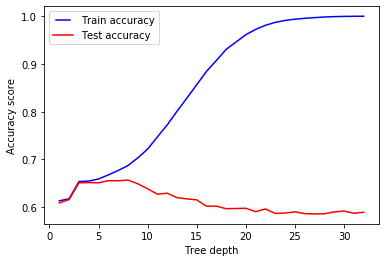

In [105]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depth, test_results, 'r', label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

Best result: max_depth = 3

### 5-fold Cross validation for tuning min_samples_leaf

Size of training data: 25526
Size of validation data: 7978


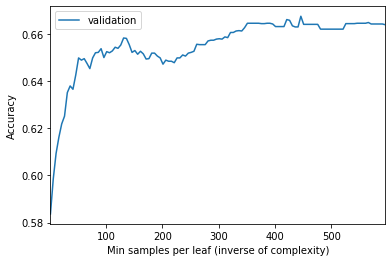

In [115]:
# Split into a sub training set and validation set
X_strain, X_val2, y_strain, y_val2 = train_test_split(X_train, y_train, test_size=0.2, random_state=3360)
print(f"Size of training data: {X_strain.shape[0]}")
print(f"Size of validation data: {X_val.shape[0]}")

min_leaves = range(1,600,5)

Accuracy_val = []
for m in min_leaves:
    # We train the model with only a portion of the training data (the 'sub-training' data set)
    model_val = DecisionTreeClassifier(min_samples_leaf=m, random_state=3360)
    model_val.fit(X_strain, y_strain)
    predictions_val = model_val.predict(X_val2)
    # And we evaluate in the validation set
    accuracy_val = accuracy_score(y_val2, predictions_val,normalize=True, sample_weight=None)
    Accuracy_val.append(accuracy_val)

results = pd.DataFrame({"min_leaves": min_leaves, "validation":Accuracy_val})
plot_fitting_curves(results)

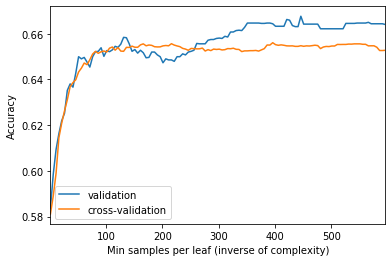

In [116]:
from sklearn.model_selection import cross_val_predict

Accuracy_cv = []
for m in min_leaves:
    # Define hyperparamter for complexity control
    model_cv = DecisionTreeClassifier(min_samples_leaf=m, random_state=3360)
    # Evaluate the performance of the hyperparameter with cross validation. 
    # The parameter 'cv' is used to determine the number of splits (folds). 
    predictions_cv = cross_val_predict(model_cv, X_train, y_train, cv=5)
    accuracy_cv = accuracy_score(y_train, predictions_cv,normalize=True, sample_weight=None)
    Accuracy_cv.append(accuracy_cv)

results = pd.DataFrame({"min_leaves": min_leaves, "validation":Accuracy_val, "cross-validation":Accuracy_cv})
plot_fitting_curves(results)

Best result: min_samples_leaf = 400

### GridSearchCV

This time, we would not train other hyperparameters, as overtunning might also lead to overfitting and bad accuracy.

In [117]:
# create try_grid
try_grid = [{'max_depth': np. linspace(1,32,32, endpoint=True),         
             'min_samples_leaf': range(1,600,5)}]               

In [118]:
from sklearn.model_selection import GridSearchCV

# create GridSearchCV object
DTM = GridSearchCV(DecisionTreeClassifier(random_state=3360), param_grid=try_grid, cv=4)

In [119]:
DTM.fit(X_train,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=3360,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17.

In [120]:
# find the best parameters
DTM.best_params_

{'max_depth': 10.0, 'min_samples_leaf': 251}

In [121]:
DTM.best_score_

0.6569198946972546

In [122]:
my_model = DecisionTreeClassifier(max_depth = 10,min_samples_leaf=251)

In [123]:
my_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=251, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [124]:
y_predict = my_model.predict(X_val)

In [125]:
print("Accuracy:",accuracy_score(y_val, y_predict, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_val, y_predict))
print("Classification Report:", '\n', classification_report(y_val, y_predict))

Accuracy: 0.6580596640762095
Confusion Matrix 
 [[2598 1430]
 [1298 2652]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.64      0.66      4028
           1       0.65      0.67      0.66      3950

    accuracy                           0.66      7978
   macro avg       0.66      0.66      0.66      7978
weighted avg       0.66      0.66      0.66      7978



## New attempt

What if this time we only use 20 features?

In [126]:
selected_features=['EXT_SOURCE_3','EXT_SOURCE_2','DAYS_BIRTH','REGION_RATING_CLIENT_W_CITY','NAME_EDUCATION_TYPE_Higher education','DAYS_LAST_PHONE_CHANGE','NAME_INCOME_TYPE_Working','NAME_EDUCATION_TYPE_Secondary / secondary special','DAYS_ID_PUBLISH','MALE_True','NAME_INCOME_TYPE_Pensioner','FLAG_DOCUMENT_3','REG_CITY_NOT_WORK_CITY','AMT_GOODS_PRICE','DAYS_REGISTRATION','REG_CITY_NOT_LIVE_CITY','REGION_POPULATION_RELATIVE','DEF_30_CNT_SOCIAL_CIRCLE','NAME_CONTRACT_TYPE_Revolving loans','DEF_60_CNT_SOCIAL_CIRCLE']
len(selected_features)

20

In [127]:
# define independent variables / attirbutes / features
features = selected_features
# define one single target variable / label
target = ['TARGET']

# get defined training dataset
X = balanced_train[features]
y = balanced_train[target]

In [128]:
# split data into 80% and 20%, put 20% in testing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=3360)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31908 entries, 181853 to 404373
Data columns (total 20 columns):
EXT_SOURCE_3                                         31908 non-null float64
EXT_SOURCE_2                                         31908 non-null float64
DAYS_BIRTH                                           31908 non-null int64
REGION_RATING_CLIENT_W_CITY                          31908 non-null int64
NAME_EDUCATION_TYPE_Higher education                 31908 non-null int64
DAYS_LAST_PHONE_CHANGE                               31908 non-null float64
NAME_INCOME_TYPE_Working                             31908 non-null int64
NAME_EDUCATION_TYPE_Secondary / secondary special    31908 non-null int64
DAYS_ID_PUBLISH                                      31908 non-null int64
MALE_True                                            31908 non-null int64
NAME_INCOME_TYPE_Pensioner                           31908 non-null int64
FLAG_DOCUMENT_3                                      31908 non-nu

In [129]:
# define our model as a decision tree model
model = DecisionTreeClassifier(random_state=3360)

In [130]:
# build the decision tree model based on defalut hyperparameter settings
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=3360, splitter='best')

In [131]:
# test model base on 20% data
pred_val = model.predict(X_val)

In [132]:
# print evaluation result for 20% test data
print("Accuracy from 20% test data:",accuracy_score(y_val, pred_val, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_val, pred_val))
print("Classification Report:", '\n', classification_report(y_val, pred_val))

Accuracy from 20% test data: 0.5822261218350464
Confusion Matrix 
 [[2268 1760]
 [1573 2377]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.56      0.58      4028
           1       0.57      0.60      0.59      3950

    accuracy                           0.58      7978
   macro avg       0.58      0.58      0.58      7978
weighted avg       0.58      0.58      0.58      7978



In [135]:
# test model base on 80% data for training
pred_val_Xtrain= model.predict(X_train)

In [136]:
# print evaluation result for 80% train data
print("Accuracy from 80% train data:",accuracy_score(y_train, pred_val_Xtrain, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_train, pred_val_Xtrain))
print("Classification Report:", '\n', classification_report(y_train, pred_val_Xtrain))

Accuracy from 80% train data: 1.0
Confusion Matrix 
 [[15915     0]
 [    0 15993]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     15915
           1       1.00      1.00      1.00     15993

    accuracy                           1.00     31908
   macro avg       1.00      1.00      1.00     31908
weighted avg       1.00      1.00      1.00     31908



### Manual Hyperparameter Tuning (Tuning tree depth)

In [137]:
# create an array that holds the max_depth
max_depth = np. linspace(1,32,32, endpoint=True)

In [138]:
max_depth

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32.])

In [139]:
# create a loop to try out different depth value
train_results =[]
test_results = []
# create a loop to try out all the number from 1 to 32 for max_depths in a decision tree
for max_depth_i in max_depth:
    dt = DecisionTreeClassifier(max_depth=max_depth_i)
    dt.fit(X_train, y_train)
    
    train_pred = dt.predict(X_train)
    accuracy = accuracy_score(y_train, train_pred, normalize=True, sample_weight=None)
    train_results.append(accuracy)
    
    y_pred = dt.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred, normalize=True, sample_weight=None)
    test_results.append(accuracy)

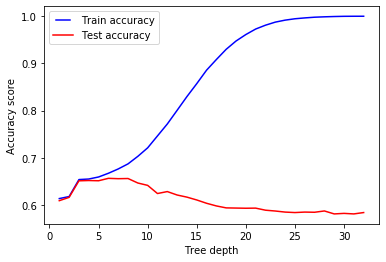

In [140]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depth, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depth, test_results, 'r', label='Test accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')
plt.show()

### 5-fold Cross validation for tuning min_samples_leaf

In [141]:
# Function to plot the results
def plot_fitting_curves(results):
    results.plot("min_leaves")
    plt.ylabel("Accuracy")
    plt.xlabel("Min samples per leaf (inverse of complexity)")
    plt.show()

Size of training data: 25526
Size of validation data: 7978


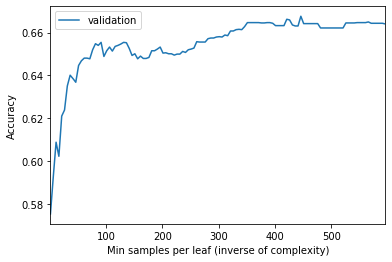

In [142]:
# Split into a sub training set and validation set
X_strain, X_val2, y_strain, y_val2 = train_test_split(X_train, y_train, test_size=0.2, random_state=3360)
print(f"Size of training data: {X_strain.shape[0]}")
print(f"Size of validation data: {X_val.shape[0]}")

min_leaves = range(1,600,5)

Accuracy_val = []
for m in min_leaves:
    # We train the model with only a portion of the training data (the 'sub-training' data set)
    model_val = DecisionTreeClassifier(min_samples_leaf=m, random_state=3360)
    model_val.fit(X_strain, y_strain)
    predictions_val = model_val.predict(X_val2)
    # And we evaluate in the validation set
    accuracy_val = accuracy_score(y_val2, predictions_val,normalize=True, sample_weight=None)
    Accuracy_val.append(accuracy_val)

results = pd.DataFrame({"min_leaves": min_leaves, "validation":Accuracy_val})
plot_fitting_curves(results)

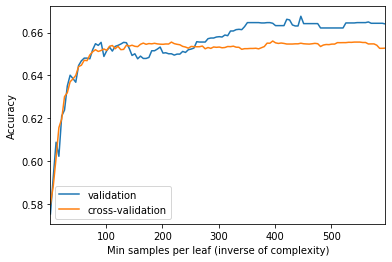

In [143]:
from sklearn.model_selection import cross_val_predict

Accuracy_cv = []
for m in min_leaves:
    # Define hyperparamter for complexity control
    model_cv = DecisionTreeClassifier(min_samples_leaf=m, random_state=3360)
    # Evaluate the performance of the hyperparameter with cross validation. 
    # The parameter 'cv' is used to determine the number of splits (folds). 
    predictions_cv = cross_val_predict(model_cv, X_train, y_train, cv=5)
    accuracy_cv = accuracy_score(y_train, predictions_cv,normalize=True, sample_weight=None)
    Accuracy_cv.append(accuracy_cv)

results = pd.DataFrame({"min_leaves": min_leaves, "validation":Accuracy_val, "cross-validation":Accuracy_cv})
plot_fitting_curves(results)

### GridSearchCV

In [144]:
# create try_grid
try_grid = [{'max_depth': np. linspace(1,32,32, endpoint=True),         
             'min_samples_leaf': range(1,600,5)}]   

In [145]:
from sklearn.model_selection import GridSearchCV

# create GridSearchCV object
DTM = GridSearchCV(DecisionTreeClassifier(random_state=3360), param_grid=try_grid, cv=4)

In [146]:
DTM.fit(X_train,y_train)

GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=3360,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17.

In [147]:
# find the best parameters
DTM.best_params_

{'max_depth': 10.0, 'min_samples_leaf': 256}

In [148]:
DTM.best_score_

0.6564811332581171

In [149]:
my_model = DecisionTreeClassifier(max_depth = 10,min_samples_leaf=256)

In [150]:
my_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=256, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [151]:
y_predict = my_model.predict(X_val)

In [152]:
print("Accuracy:",accuracy_score(y_val, y_predict, normalize=True, sample_weight=None))
print("Confusion Matrix", '\n', confusion_matrix(y_val, y_predict))
print("Classification Report:", '\n', classification_report(y_val, y_predict))

Accuracy: 0.6583103534720481
Confusion Matrix 
 [[2595 1433]
 [1293 2657]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.64      0.66      4028
           1       0.65      0.67      0.66      3950

    accuracy                           0.66      7978
   macro avg       0.66      0.66      0.66      7978
weighted avg       0.66      0.66      0.66      7978



### Conclusion and findings

The results are fairly predictive, better than the majority classifier.
Good practice of feature selection and data pre-processing would yield better results.
The 20-feature model yields similar results to the 30-feature model.
We prefer simplicity, so we will take the 20-feature model as the final model for this part.

## This is the end of Part 2.1 Decision Tree Classifier.